# Hotel Booking Data Cleaning Project

## Overview

This project focuses on cleaning and preparing the **Hotel Booking Demand Dataset** for analysis. The dataset contains over 119,000 booking records from a city hotel and a resort hotel. It includes detailed information such as reservation status, guest demographics, booking channels, and more.

## Objective

The objective of this notebook is to:

1. Identify and handle missing values
2. Correct inconsistent or erroneous entries3
3. Fix data types (e.g., dates, categories)
4. Remove duplicates
5. Engineer useful features (e.g., total guests, is family trip)
6. Export a clean version of the dataset for analysis or modeling

## Tools Used

- **Pandas** and **NumPy** for data cleaning and manipulation
- **Matplotlib** and **Seaborn** for quick visual checks
- **Missingno** for missing data visualization

## Dataset Source

- Title: *Hotel Booking Demand*
- Author: Antonio, Almeida & Nunes (2019)
- [Kaggle Dataset Link](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand)

# 1. Identify and Handle Missing Values

In [3]:
# important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install missingno
import missingno as msno

In [4]:
# Load data
df = pd.read_csv("hotel_bookings.csv")

# Check missing values
df.isnull().sum()[df.isnull().sum() > 0]

children         4
country        488
agent        16340
company     112593
dtype: int64

<Axes: >

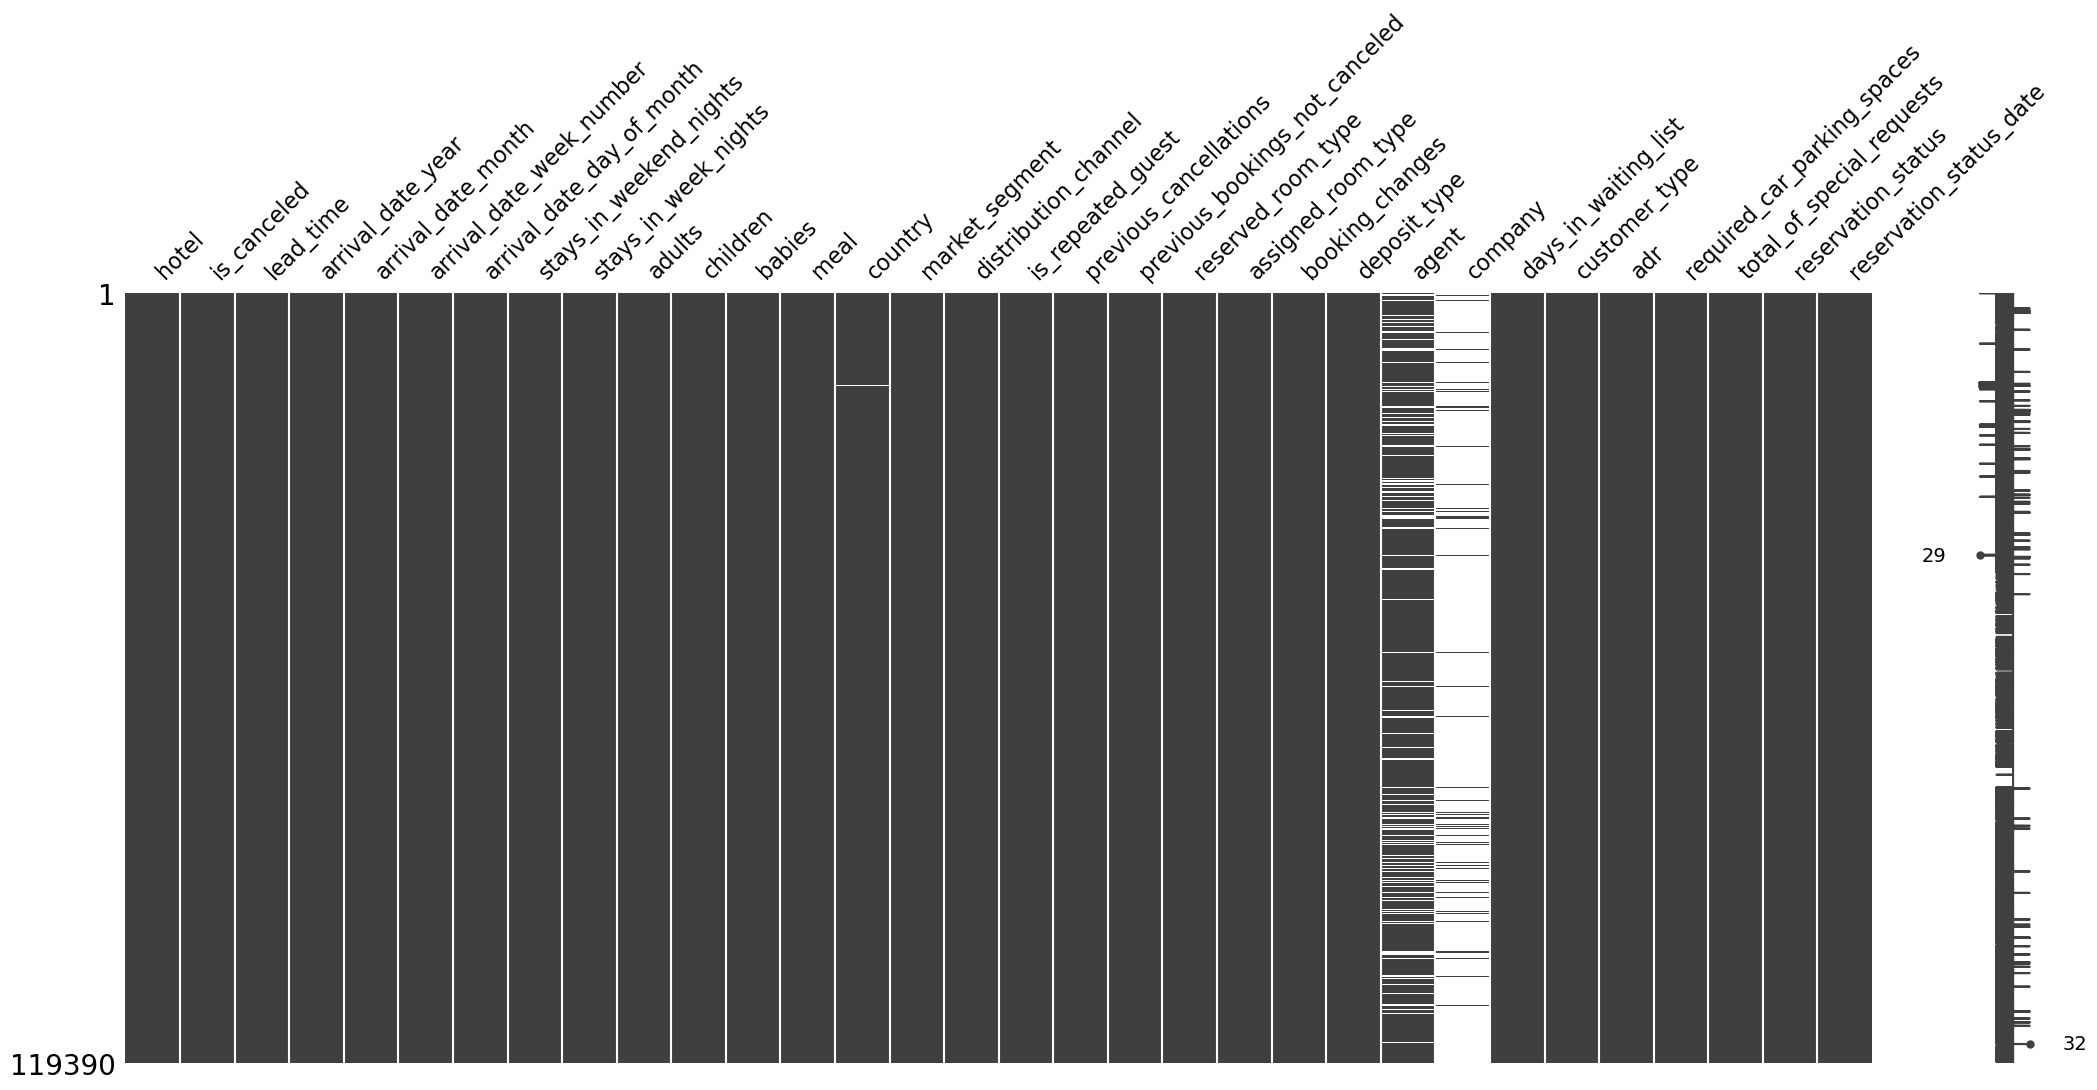

In [5]:
# Visualize missing data
msno.matrix(df)

The missingno matrix plot provides a clear visual representation of missing data in the dataset. It shows that the `company` column has the most missing values, followed by the `agent` column, while `country` has a moderate number of missing entries and `children` has very few. Most other columns are nearly complete with little to no missing data. The missing values appear scattered throughout the dataset without any clear pattern, indicating that missingness is isolated to specific fields rather than entire records. This visualization helps prioritize which columns need cleaning and imputation.

In [7]:
# Fill missing values
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)
df['children'] = df['children'].fillna(df['children'].median())
df['country'] = df['country'].fillna('Unknown')

In [8]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


After examining the dataset for missing values, we addressed them by filling the agent and company columns with zero, indicating bookings without an associated agent or company. For the children column, missing entries were replaced with the median value to maintain consistency without introducing bias. The country column’s missing values were substituted with "Unknown" to preserve records while marking the absence of data. This cleaning step successfully eliminated all missing values, ensuring the dataset’s completeness for subsequent analysis.

# 2. Correct Inconsistent or Erroneous Entries

In [9]:
# Check and fix inconsistent categorical values
df['meal'].value_counts()
df['meal'] = df['meal'].replace({'SC': 'Self Catering', 'Undefined': 'Not specified'})

# Confirm correction
df['meal'].value_counts()

meal
BB               92310
HB               14463
Self Catering    10650
Not specified     1169
FB                 798
Name: count, dtype: int64

We handled inconsistent values in the meal column by replacing 'SC' with 'Self Catering' and 'Undefined' with 'Not specified', then confirmed the changes with value_counts(). This ensured your meal categories are clean and standardized, making analysis more accurate and interpretable.

# 3. Fix Data Types (e.g., dates, categories)

In [14]:
# Check data types
df.dtypes

# Convert date column
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

Converted reservation_status_date from object to datetime64

# 4. Remove Duplicates

In [18]:
# Find and remove duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

# 5. Engineer Useful Features (e.g., total guests, is family trip)

In [19]:
# Create new features
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['is_family'] = np.where(df['children'] > 0, 1, 0)

df[['adults', 'children', 'babies', 'total_guests', 'is_family']].head()

,adults,children,babies,total_guests,is_family
0,2,0.0,0,2.0,0
1,2,0.0,0,2.0,0
2,1,0.0,0,1.0,0
3,1,0.0,0,1.0,0
4,2,0.0,0,2.0,0


Added:

- total_guests: total number of people per booking
- is_family: flag for family trip (children > 0)

# 6. Export Cleaned Dataset (🎯 Objective: Export Cleaned Data)

In [20]:
df.to_csv('cleaned_hotel_bookings.csv', index=False)

does not produce visible output in Jupyter Notebook — it simply saves the cleaned DataFrame to a CSV file named cleaned_hotel_bookings.csv in your current working directory, without including the row index.

# Data Cleaning Report — Hotel Bookings Dataset

### Overview

This project involved cleaning and preparing the hotel bookings dataset for analysis. The goal was to address missing values, correct inconsistencies, fix data types, remove duplicates, and engineer useful features to ensure the data is accurate and reliable.

### Steps Taken

1. **Missing Values**
   Missing data was identified primarily in `agent`, `company`, `children`, and `country` columns.

   * `agent` and `company` missing values were replaced with 0 to indicate no associated agent/company.
   * `children` missing values were imputed with the median number of children.
   * `country` missing values were replaced with `'Unknown'`.

2. **Inconsistent Categorical Values**
   The `meal` column had inconsistent labels like `'SC'` and `'Undefined'`. These were standardized to `'Self Catering'` and `'Not specified'` respectively.

3. **Data Type Corrections**
   The `reservation_status_date` column was converted from an object (string) to datetime format to allow date-based operations.

4. **Duplicates Removal**
   Duplicate rows were detected and removed to prevent bias or skewing in analysis.

5. **Feature Engineering**
   New features such as total guests (sum of adults, children, babies) and a binary indicator for family trips were created to add more insights.

6. **Export Clean Data**
   The cleaned dataset was saved as `cleaned_hotel_bookings.csv` for downstream analysis or modeling.

### Outcome

After cleaning, the dataset is free of missing values in critical columns, consistent in categorical data, and has appropriate data types. Duplicate entries have been eliminated, and additional features enhance the dataset’s usability. This clean, well-structured dataset is now ready for robust exploratory data analysis, visualization, or machine learning modeling.